# Thinking Conditionally: Tradelanes and Modes
DA Probability & Statistics Learning Series • Lesson 2

<img src="https://imgs.xkcd.com/comics/conditionals.png" align="center"/>

Welcome, again!

*See **#da_prob_stat** for discussion during and after this tutorial.*


## Goals

**You**: Develop an intuition around conditional vs. unconditional probabilities
<br>
**You**: Invent some math to answer questions. Sorta feel badass about it.
<br>
**You**: Understand independence of events.
<br>
**You**: Get feet wet regarding the Law of Total Probability (LOTP).


---


**Me**: Do a better job of managing time!
<br>
**Me**: Take more time to explain code.
<br>
**Me**: Be explicit about what's to be done now vs. later for homework.
<br>
**Me**: Cold call more! 😈


Let's get started by bringing in the stuff we're going to need for this lesson.

In [1]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [2]:
# Import dependencies 
from custom.db_utils import get_connection
import pandas as pd

# Object typing
from typing import TypeVar
PandasSeries = TypeVar('pd.core.series.Series')
PandasDataFrame = TypeVar('pd.core.frame.DataFrame')

# Data viz
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [3]:
# Get the database connection and cursor objects
conn, cur = get_connection()

# Use a context manager to open and close connection and files
with conn:
    
    # Open the query.sql file
    with open('query.sql', 'r') as q:

        # Save contents of query.sql as string
        query_str = q.read()
    
    # Use the read_sql method to get the data from Snowflake into a 
    # Pandas dataframe
    df = pd.read_sql(query_str, conn)
    
    # Make all the columns lowercase
    df.columns = map(str.lower, df.columns)

# Preview the data
df.sample(3)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


,shipment_id,accepted_quote_at,tradelane,mode
4839,488806,2019-02-08 00:00:00+00:00,FEWB,Ocean
69881,546472,2019-06-11 00:00:00+00:00,TPEB,Ocean
156246,617755,2019-09-12 00:00:00+00:00,TAWB,Ocean


## Motivating Question 🤔

> Are shipments' tradelanes and modes independent of one another?


## Quick Review ⏪

We've already seen how to use counting and the naïve definition of probability to calculate the probability of events in a discrete setting.

To calculate the $P(A)$, the probability of some event $A$ occurring, we just need to count the number of **outcomes** in **event** $A$ and divide this by the total number of outcomes found in the **sample space**, $S$.

### Conditional Probability

Let's start with a pretty straightforward example taken from the diagnostic quiz awhile back.

**Question**:

> Imagine a client makes exactly two shipments. Assume that for this client, any given shipment is transported either via ocean (event O) or by air (event A) with equal probability (i.e., P(O) = P(A) = 0.5) and that the choice of transportation for one shipment is independent of that of another.
>
> **Which of the following scenarios is more probable?**


A. Both shipments are air if we know at least one shipment is air.
<br>
B. Both shipments are air if we know the second shipment is air.
<br>
C. Both scenarios are equally probable.
<br>

**Answer**: 

> B. Both shipments are air if we know the second shipment is air.

Remember "pebble world" from last time?

We know that each outcome ("pebble") is equally likely ("weighs the same"). Now all we have to do is consider how each event differs.

![Quiz Question Sample Space](quiz_question_sample_space.png)

- The <font color='orange'>orange box</font> is the **event** that _at least one shipment is air_.
- The <font color='red'>red box</font> is the **event** that _the second shipment is air_. 
- The <font color='teal'>teal oval</font> is the **event** that _both shipments are air_. (Note, that this event only consists of one **outcome**.)

If we formalize this using the notation we learned last time and the naïve definition of probability, we have:

$$
\begin{align}
P(\text{at least one shipment is air}) &= \frac{3}{4}\\
P(\text{the second shipment is air}) &= \frac{1}{2}
\end{align}
$$

When we **condition** on evidence or information or what we observe, we need to update our probabilities to incorporate what we've learned. 

Said another way, we need to **adjust our our sample space (i.e., the denominator of the probability fraction) to include only the events (or outcomes) that meet the condition**.

The way we notationally represent this is by using a "|" to separate what we want to know (an event or events) from what we are conditioning on (another event or events). For this problem, the answer choices expressed in this notation are:

A. $P(\text{both air shipments}\,|\,\text{at least one shipment is air})$<br>
B. $P(\text{both air shipments}\,|\,\text{the second shipment is air})$<br>

How do we take the information we have from what we know (unconditionally) and use it to get these conditional probabilities?

...by redefining what we consider "possible" outcomes!

Let's tackle $P(\text{both air shipments}\,|\,\text{at least one shipment is air})$. We are **conditioning** on the event that *at least one shipment is air*, so let's update what we consider possible outcomes under this condition:

![Quiz Question Choice A](quiz_question_choice_A.png)

Then it becomes immediately obvious that $P(\text{both air shipments}\,|\,\text{at least one shipment is air}) = \frac{1}{3}$.

Similarly, $P(\text{both air shipments}\,|\,\text{the second shipment is air}) = \frac{1}{2}$.

![Quiz Question Choice B](quiz_question_choice_B.png)

From here, we can see that knowing more information about which shipment was air increases our belief that both shipments are air:

- **Unconditionally**, we assigned a 25% probability that both shipments were air, $P(\text{both shipments are air}) = \frac{1}{4}$.<br>
- If we knew that *at least one shipment was air*, we could update our priors and **condition on this information**, leading us to increase our belief to 33% that both shipments were air: $P(\text{both shipments are air}\,|\,\text{at least one shipment is air}) = \frac{1}{3}$.<br>
- If we knew that *the second shipment in particular was air*, we can **update our priors even more**, which leads to a stronger belief of 50% that both shipments were air: $P(\text{both shipments are air}\,|\,\text{the second shipment is air}) = \frac{1}{2}$.

A _Bayesian_ statistician would say that we've **updated our prior beliefs** (i.e., our *priors*).

## Warm-up 💻

We're going to try our hand at determining the independence of events using simple data visualizations and a little logic. If we're lucky we'll have stumbled upon our first test statistic.

**TODO**: Explore the data a little. Try to illustrate the relationship between tradelane and mode.

In [4]:
# Isolate data to be used
tradelane_mode_df = df[['tradelane', 'mode']]

# Preview the data
display(tradelane_mode_df.head())

,tradelane,mode
0,TPEB,Air
1,TPEB,Air
2,TPEB,Air
3,TPEB,Ocean
4,TPEB,Ocean


In [5]:
## TODO: Explore the data; some suggested questions to answer
##       are listed below.

# How big is the data?
print(f"The data spans {tradelane_mode_df.shape[0]} rows and {tradelane_mode_df.shape[1]} columns.")

# Checks that the data contains no nulls
nulls_check = tradelane_mode_df.isnull().any(axis=1).any()
print(f"Are there nulls anywhere in this dataframe? {nulls_check}")

# How many unique values are in each columns?
display(tradelane_mode_df.nunique())

# What are the unique values in each column?
unique_values = {col: tradelane_mode_df[col].value_counts() for col in tradelane_mode_df.columns}
display(unique_values['mode'])
display(unique_values['tradelane'])

The data spans 200002 rows and 2 columns.
Are there nulls anywhere in this dataframe? False


tradelane    12
mode          4
dtype: int64

Ocean                    150254
Air                       41977
Truck - Domestic           6611
Truck - International      1160
Name: mode, dtype: int64

TPEB                       132037
FEWB                        27659
TAWB                        10823
ROW                          7241
Domestic                     5590
TAEB                         5589
TPWB                         4913
NA Export                    2976
Latin NB                     2505
FEEB                          456
Oceania NB                    121
Africa to North America        92
Name: tradelane, dtype: int64

**Question**: Answer the following qualitatively based on what you see in the data (i.e., no need to perform statistical tests or calculations).

> Is a shipment's tradelane independent of its mode?

(Knowing each row in our dataframe is a shipment, what would you want to look for? How would you need to transform your data?)

Well, right now we have basically two lists with each row representing one data point. We should categorize the data based on the features/variables/attributes we have on hand! 

Let's _cross-tabulate_ this table so we have rows representing `tradelanes` and columns representing `mode`. The values in each cell will be the counts of shipments.

Notice, by transforming our data this way, we've created a sample space consisting of disjoint events! Each cell is an event: its the _intersection_ of a particular `tradelane` and a particular `mode`.

**TODO**: Transform our data into something workable by cross-tabulating our data with `tradelane`s as rows and `mode`s as columns.

In [6]:
## TODO: Cross-tabulate shipments
# (Read docs for Pandas' crosstab function)

# Use this variable to store cross-tabulation WITHOUT
# marginal distributions (see 'margins' parameter)
tradelane_mode_xt = pd.crosstab(index=tradelane_mode_df['tradelane'], 
                                columns=tradelane_mode_df['mode'])

# Use this variable to store cross-tabulation WITH
# marginal distributions (see 'margins' parameter)
tradelane_mode_xt_marg = pd.crosstab(index=tradelane_mode_df['tradelane'], 
                                     columns=tradelane_mode_df['mode'], 
                                     margins=True)

display(tradelane_mode_xt)
display(tradelane_mode_xt_marg)

mode,Air,Ocean,Truck - Domestic,Truck - International
tradelane,,,,
Africa to North America,6,86,0,0
Domestic,51,320,5171,48
FEEB,225,231,0,0
FEWB,6381,21248,6,24
Latin NB,545,884,847,229
NA Export,131,2837,0,8
Oceania NB,46,75,0,0
ROW,2102,3788,568,783
TAEB,1526,4062,1,0


mode,Air,Ocean,Truck - Domestic,Truck - International,All
tradelane,,,,,
Africa to North America,6,86,0,0,92
Domestic,51,320,5171,48,5590
FEEB,225,231,0,0,456
FEWB,6381,21248,6,24,27659
Latin NB,545,884,847,229,2505
NA Export,131,2837,0,8,2976
Oceania NB,46,75,0,0,121
ROW,2102,3788,568,783,7241
TAEB,1526,4062,1,0,5589


Below, I've provided a helper function that will plot a heatmap of the _joint distribution_.

In [7]:
# Helper functions
def heatmap(data: PandasDataFrame, 
            A: str,
            B: str) -> None:
    '''
    Plots heatmap of bivariate frequency data, i.e., P(A|B) when supplied
    data, A (as a string) and B (as a string)
    '''
    fig, ax = plt.subplots()
    sns.heatmap(data, ax=ax, annot=True, fmt='.0%', 
                cmap='cividis', vmin=0, vmax=1)
    ax.set_title("$P({0}\,|\,{1})$".format(A, B), 
                 fontsize='x-large')
    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
    plt.show()

**TODO**: Let's condition on `mode` and see what the distribution looks like.

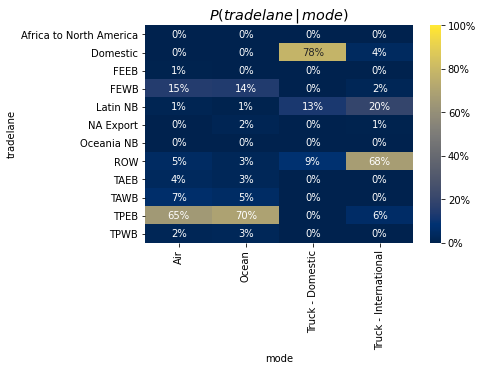

mode,All
tradelane,
Africa to North America,0%
Domestic,3%
FEEB,0%
FEWB,14%
Latin NB,1%
NA Export,1%
Oceania NB,0%
ROW,4%
TAEB,3%


In [8]:
## TODO: Convert to relative frequencies, conditioning on mode
data = tradelane_mode_xt/tradelane_mode_xt.sum(axis=0)
heatmap(data, 'tradelane', 'mode')

# Compare to marginal frequency of tradelane
mf_tradelane = pd.DataFrame(tradelane_mode_xt_marg/tradelane_mode_xt.sum().sum())
mf_tradelane.loc[mf_tradelane.index[:-1], 
                 ['All']].style.format("{:.0%}").background_gradient(cmap='cividis', 
                                                                 axis=1, 
                                                                 vmin=0, 
                                                                 vmax=1)

**TODO**: Compare the _marginal distribution_ (on the bottom) versus each column in the heatmap above. 

**Question**: 

> What does this tell you about independence?

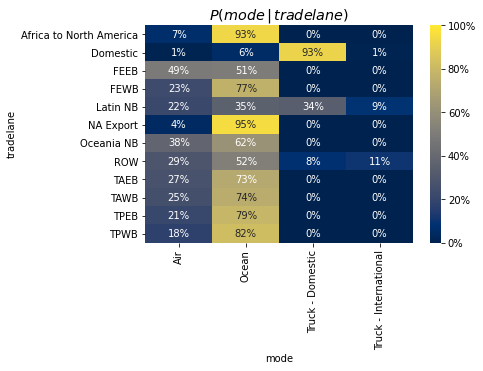

mode,Air,Ocean,Truck - Domestic,Truck - International
tradelane,,,,
All,21%,75%,3%,1%


In [9]:
# Convert to relative frequencies, conditioning on tradelane
data = tradelane_mode_xt.apply(lambda s: s/tradelane_mode_xt.sum(axis=1))
heatmap(data, 'mode', 'tradelane')

# Compare to marginal frequency of mode
mf_mode = pd.DataFrame(tradelane_mode_xt_marg.T/tradelane_mode_xt.sum().sum())
mf_mode.loc[mf_mode.index[:-1],
            ['All']].T.style.format("{:.0%}").background_gradient(cmap='cividis', 
                                                                  axis=1, 
                                                                  vmin=0, 
                                                                  vmax=1)

But you are all data analysts. You're supposed to measure things and tell us what they mean.

**Question**: 

> How would I go about measuring the extent to which these variables are independent?

**Meta Question**: 

> How does ~Abhi~ someone answer a question they may not be prepared for?

**Meta Answer**: 

> Make something up and talk about it until it starts becoming believable!

That being said, back to the original question:

> How would I go about measuring the extent to which these variables are independent?

In [10]:
# These are the observed frequencies
print('Observed Frequencies:')
display(tradelane_mode_xt_marg.style.format("{:,.0f}"))

Observed Frequencies:


mode,Air,Ocean,Truck - Domestic,Truck - International,All
tradelane,,,,,
Africa to North America,6,86,0,0,92
Domestic,51,320,"5,171",48,"5,590"
FEEB,225,231,0,0,456
FEWB,"6,381","21,248",6,24,"27,659"
Latin NB,545,884,847,229,"2,505"
NA Export,131,"2,837",0,8,"2,976"
Oceania NB,46,75,0,0,121
ROW,"2,102","3,788",568,783,"7,241"
TAEB,"1,526","4,062",1,0,"5,589"


**Question**: 

> _If_ these two variables were independent, what values would I expect in each cell?

In [11]:
# Useful function to get expected counts
from scipy.stats import chi2_contingency

# Get expected counts and make into dataframe matching our
# previous cross-tab
chi2_stat, p_value, dof, exp_counts = chi2_contingency(tradelane_mode_xt)
exp_tradelane_mode_xt = pd.DataFrame(exp_counts)
exp_tradelane_mode_xt.index = tradelane_mode_xt.index
exp_tradelane_mode_xt.columns = tradelane_mode_xt.columns

# Add 'All' total row & column
exp_tradelane_mode_xt['All'] = exp_tradelane_mode_xt.sum(axis=1)
exp_tradelane_mode_xt = exp_tradelane_mode_xt.append(
    exp_tradelane_mode_xt.sum(axis=0).rename('All'))

# These are the expected frequencies (if tradelane and mode were independent)
print('Expected Frequencies:')
exp_tradelane_mode_xt.style.format("{:,.0f}")


Expected Frequencies:


mode,Air,Ocean,Truck - Domestic,Truck - International,All
tradelane,,,,,
Africa to North America,19,69,3,1,92
Domestic,"1,173","4,200",185,32,"5,590"
FEEB,96,343,15,3,456
FEWB,"5,805","20,779",914,160,"27,659"
Latin NB,526,"1,882",83,15,"2,505"
NA Export,625,"2,236",98,17,"2,976"
Oceania NB,25,91,4,1,121
ROW,"1,520","5,440",239,42,"7,241"
TAEB,"1,173","4,199",185,32,"5,589"


**TODO**: Now, look at the differences between what we _observed_ and what we _expected_ to see.

In [12]:
# TODO: Subtract the expected from the observed frequencies
tradelane_mode_xt_diff = tradelane_mode_xt_marg - exp_tradelane_mode_xt
tradelane_mode_xt_diff.style.format("{:.0f}")

mode,Air,Ocean,Truck - Domestic,Truck - International,All
tradelane,,,,,
Africa to North America,-13,17,-3,-1,0
Domestic,-1122,-3880,4986,16,0
FEEB,129,-112,-15,-3,0
FEWB,576,469,-908,-136,0
Latin NB,19,-998,764,214,-0
NA Export,-494,601,-98,-9,0
Oceania NB,21,-16,-4,-1,-0
ROW,582,-1652,329,741,0
TAEB,353,-137,-184,-32,0


**Question**: 

> The errors are positive and negative. How can we generalize this _algorithm_ so the metric it produces is consistent?

**Answer**: 

> Let's square the differences!
>
> $$
 (O_{i,j}-E_{i,j})^2
 $$

**Question**: 

> But how do we deal with the absolute magnitude of these numbers? 

(We wouldn't want our metric to be bigger just because we have more counts of stuff.)

**Answer**: 

> We can normalize by the expected count in each cell!
> 
> $$
\frac{(O_{i,j}-E_{i,j})^2}{E_{i,j}}
$$

Great! So now we have the difference between observed and expected -- our _error_. 

But there are lots of numbers here, one for each cell, in fact.

**Question**: 

> How can we summarize this in one number?

**Answer**: 

> Let's just add it all up!
> 
> $$
\sum_{i,j}^{}\frac{(O_{i,j}-E_{i,j})^2}{E_{i,j}}
$$

Let's call our newly concocted metric something: how about the "$\chi^{2}$ statistic"?

**TODO**: Implement this statistic. 

In [13]:
# TODO: Implement our metric so it matches the out-of-box calculation
our_chi2 = (tradelane_mode_xt_diff**2).div(exp_tradelane_mode_xt).sum().sum()

print(f"Our Chi-Square statistic: {our_chi2:>20.2f}")
print(f"SciPy's Chi-Square statistic: {chi2_stat:>16.2f}")


Our Chi-Square statistic:            172597.65
SciPy's Chi-Square statistic:        172597.65


![Nice](https://media.giphy.com/media/8xgqLTTgWqHWU/giphy.gif)

Nice. We just invented some math that's somewhat legit.

Look familiar? This was in the prompt of the last question on the diagnostic quiz re: interpreting $p$-values)!

Later, once we have the fundamentals down, we'll get to statistical hypothesis testing. But let's look at the $p$-value for our test statistic here:

In [14]:
display(dof)
display(p_value)

33

0.0

As we will explore much later (we should work to get the fundamentals down first), **the $p$-value is a _conditional_ probability itself**!

**Question**: 

> Under what condition is the $p$-value?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/P-value_in_statistical_significance_testing.svg/1024px-P-value_in_statistical_significance_testing.svg.png" width=500/>

## Combining Events 🌗 🌓 🌕

An **event** is just a subset of the **sample space**. So when we _union_ or _intersect_ events, we're just doing normal set operations.

### Intersection of Events $\cap$

$$
P(A \cap B) = P(B)P(A|B) = P(A)P(B|A)
$$

Why is this true?

![Conditional Probability in "Pebble World"](./pebble_world_conditioning.png)

### Union of Disjoint Events

When events are *disjoint*, taking their union is straightforward since there is no overlap in events. All we do is sum up the disjoint events (like we did with the shipments-tradelane problem last time). 

![Third Axiom of Probability](https://wikimedia.org/api/rest_v1/media/math/render/svg/47f22fe03df467b1d20785e5026bac39fabd9edc)

In fact, this is one of the [Axioms of Probability](https://en.wikipedia.org/wiki/Probability_axioms)!

...but things get trickier when events do overlap (read: intersect)!

### Union of Events $\cup$

**Question**

> So, what do we do when events overlap?

![2 overlapping events](https://www.probabilitycourse.com/images/chapter1/union_b.png)

<img src="https://www.conceptdraw.com/How-To-Guide/picture/3-circle-venn.png" width=700 />

**Answer**: 

> Principle of Inclusion-Exclusion
>
>![PIE](https://wikimedia.org/api/rest_v1/media/math/render/svg/c14e130250afb7484a5162c7fc76fab425397279)

This isn't as crazy as it looks. Sit and think about what it's doing: try some simple examples, try to explain it to a roommate, or even write some Python if you have to!

**Homework**:

> Let's say SF Flexporters return to a post-COVID working arrangement wherein each of the 20 DAs are "buddied up" with one other DA. Effectively, there are two shifts: a Monday shift (10 DAs) and a Friday shift consisting of the other 10 DAs (i.e., the buddies of those in the first shift). 
>
> Assume that seating is random and independent (i.e., no coordination of seats between buddies or among those in a shift) -- people just show up and sit somewhere.
>
> **What's the probability that no one in the Friday shift is sitting in the same seat as their \[Monday shift\] buddy?**

(Remember, you have a computer. Try to simulate this if the analytical solution isn't coming to you. **Work together!**)

## Independence ⫫

Now we can introduce, more formally, what **independence** means among events. Later we'll extend this notion to random variables.

### Definition of Independence

<br>

$A$ and $B$ are **independent** of one another if and only if $P(A \cap B) = P(A)P(B)$. (Sometimes this is written as $P(A,B) = P(A)P(B)$.)

Said another way, $A$ and $B$ are **independent** of one another if and only if $P(A\,|\,B) = P(A)$, which is equivalent to $P(B\,|\,A) = P(B)$.

In plain-speak, this just says that having information about one event occurring (or not*) doesn't change the probability of the other event.

<div>
<img src="https://courses.cs.cornell.edu/cs2800/wiki/images/thumb/3/3b/Conditional-probability.svg/445px-Conditional-probability.svg.png" width="800"/>
</div>

<br>

As mentioned before, **conditioning just re-normalizes our set of possible outcomes given new information**. This provides the basis for translating between unconditional probabilities and conditional probabilities.


Going back to our diagnostic quiz question about ocean and air shipments, we can use this formalization to calculate the probabilities of each scenario directly:

_Scenario A_

$$
\begin{align}
P(\text{both shipments are air}\,|\,\text{at least one shipment is air}) &= \\
\frac{P(\text{both shipments are air} \cap \text{at least one shipment is air})}{P(\text{at least one shipment is air})} &= \frac{P(\text{both shipments are air})}{P(\text{at least one shipment is air})} \\
&= \frac{\frac{1}{4}}{\frac{3}{4}} \\
&= \frac{1}{3}
\end{align}
$$

_Scenario B_

$$
\begin{align}
P(\text{both shipments are air}\,|\,\text{the second shipment is air}) &=\\ 
\frac{P(\text{both shipments are air} \cap \text{the second shipment is air})}{P(\text{the second shipment is air})} &= \frac{P(\text{both shipments are air})}{P(\text{the second shipment is air})} \\
&= \frac{\frac{1}{4}}{\frac{1}{2}} \\
&= \frac{1}{2}
\end{align}
$$

So, are the events in the two scenarios here independent?

**Questions**:

> Is the event "both shipments are air" independent of "at least one shipment is air"?

> Is the event "both shipments are air" independent of "the second shipment is air"?


**Answers**:

> No. The events in the first scenario are NOT independent, nor are the events in the second scenario.

**Homework**:

> \* Prove that $P(A, B) = P(A)P(B) \implies P(A\,|\,B^c) = P(A)$. 

In plain-speak, I'm asking you to prove that if an event is indepedent of another event having occurring, it is also indepedent of the other event not occurring.

Intuitively, it should make sense that if two things are independent, whether one of them happens _or not_ shouldn't affect the other, vice versa.

(Hint: Use what you already know about complements.)


## The Law of Total Probability 📜

Now we need connect conditional and unconditional probabilities. We do this with **the Law of Total Probability** (LOTP). 

<br>

Once we understand this, we will have all the required tools to prove the all-important identity: **Bayes' Theorem**, which we'll leave for next time. 

<br>

You'll also have the tools to deal with conditioning on multiple events/pieces of information since the concepts translate generally.



**The Law of Total Probability** is an incredibly useful problem solving tool. Formally stated, it says:

$$
\text{If }A_i,...,A_n \text{ is a partition of the sample space }S \text{, then }P(B) = \sum_{i=1}^{n}{P(B|A_i)P(A_i)}.
$$

But this is likely better illustrated with a picture:

![Partition of B by A](./LOTP.png)

Okay, your turn to practice!

**Question**: 

> What's $P(\text{TPEB})$. 

Partition the data and use LOTP so you can calculate it. Check against the data directly.

In [15]:
## TODO: Demonstrate LOTP on our data; start with tradelane_mode_xt

# This is the denominator to convert cardinality of sets to probabilities
# (per the naïve Definition of Probability)
S = tradelane_mode_xt.sum().sum()

# Show that p_TPEB_by_LTOP == p_TPEB
p_TPEB = tradelane_mode_xt.loc['TPEB',:].sum()/S

p_Air = tradelane_mode_xt.loc[:,'Air'].sum()/S

p_not_Air = 1 - p_Air

p_TPEB_given_Air = (tradelane_mode_xt.loc['TPEB', 
                                         'Air'
                            ].sum()/S) / p_Air

p_TPEB_given_not_Air = (tradelane_mode_xt.loc['TPEB', 
                                             tradelane_mode_xt.columns != 'Air'
                            ].sum()/S) / p_not_Air


p_TPEB_by_LOTP = (p_TPEB_given_Air * p_Air) + (p_TPEB_given_not_Air * p_not_Air)

# Check if our answer is right   
print(f"Our Answer: {p_TPEB_by_LOTP:.5%}")
print(f"Expected Answer: {p_TPEB:.5%}")

Our Answer: 66.01784%
Expected Answer: 66.01784%


**Homework**: 

> How would I get $P(\text{Ocean} \cup \text{Truck - Domestic}\,|\,\text{TAWB}\cup\text{Latin NB})$? 

> What can you say when you compare this with the unconditional probability, $P(\text{Ocean} \cup \text{Truck - Domestic})$?

> Is this the same thing as $P(\text{TAWB}\cup\text{Latin NB}\,|\,\text{Ocean} \cup \text{Truck - Domestic})$? Why or why not?

Oh, yeah...**work together**!

In [16]:
## TODO: P(Ocean or Truck - Domestic | TAWB or Latin NB) = ?
# Not that its necessarily useful, but notice the unions are of 
# disjoint events (a shipment cannot be TAWB and Latin NB)

# Let A = Ocean or Truck - Domestic
# P(A)
p_A = tradelane_mode_xt.loc[:,['Ocean', 'Truck - Domestic']].sum().sum() / S

# Let B = TAWB or Latin NB
# P(B)
p_B = tradelane_mode_xt.loc[["TAWB", "Latin NB"]].sum().sum() / S

# P(A, B)
p_A_and_B = tradelane_mode_xt.loc[["TAWB", "Latin NB"],
                                  ['Ocean', 'Truck - Domestic']].sum().sum() / S

print(f"P(Ocean or Truck - Domestic | TAWB or Latin NB) = {p_A_and_B/p_B:.2%}")
print(f"P(Ocean or Truck - Domestic) = {p_A:.2%}")

P(Ocean or Truck - Domestic | TAWB or Latin NB) = 73.49%
P(Ocean or Truck - Domestic) = 78.43%
